<a href="https://www.kaggle.com/code/kylecarskadden/ece4424-ml-project?scriptVersionId=94794341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from tensorflow import keras
from keras import optimizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
# parameters for this script
batch_size = 256
num_classes = 10
epochs = 50

In [9]:
# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

In [11]:
def cnn(num_layers):

  model = Sequential()

  if num_layers >= 1:
   model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
   model.add(Activation('relu'))
   model.add(Conv2D(64, (3, 3), padding='same'))
   model.add(Activation('relu'))
   model.add(MaxPooling2D(pool_size=(2,2)))
   model.add(Dropout(0.25))
    
   if num_layers >= 2:
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Dropout(0.25)) 
                  
      if num_layers >= 3:  
         model.add(Conv2D(128, (3, 3), padding='same'))
         model.add(Activation('relu'))
         model.add(Conv2D(64, (3, 3), padding='same'))
         model.add(Activation('relu'))
         model.add(MaxPooling2D(pool_size=(2,2)))
         model.add(Dropout(0.25))  
                      
         if num_layers >= 4:
            model.add(Conv2D(256, (3, 3), padding='same'))
            model.add(Activation('relu'))
            model.add(Conv2D(256, (3, 3), padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.25)) 
                          
            if num_layers >= 5:
               model.add(Conv2D(512, (3, 3), padding='same'))
               model.add(Activation('relu'))
               model.add(Conv2D(512, (3, 3), padding='same'))
               model.add(Activation('relu'))
               model.add(MaxPooling2D(pool_size=(2,2)))
               model.add(Dropout(0.25))

  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  opt = keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.9, decay=1e-6)

  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  print(model.summary())

  return model

Training CNN with 1 convolutional layers
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_46 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normali

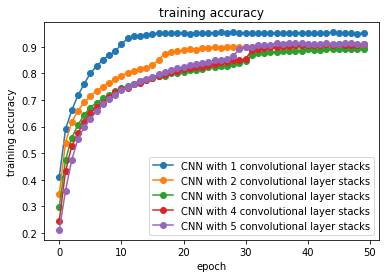

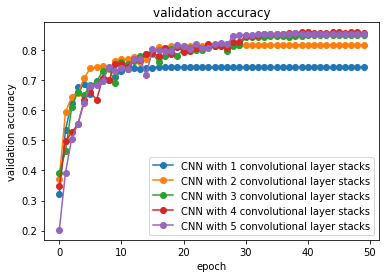

313/313 [==============================] - 1s 4ms/step - loss: 1.0837 - accuracy: 0.7346
Test accuracy for CNN with 1 convolutional layers: 0.7346000075340271
313/313 [==============================] - 1s 4ms/step - loss: 0.6519 - accuracy: 0.8109
Test accuracy for CNN with 2 convolutional layers: 0.8108999729156494
313/313 [==============================] - 1s 4ms/step - loss: 0.4987 - accuracy: 0.8477
Test accuracy for CNN with 3 convolutional layers: 0.8476999998092651
313/313 [==============================] - 2s 4ms/step - loss: 0.4949 - accuracy: 0.8493
Test accuracy for CNN with 4 convolutional layers: 0.8493000268936157
313/313 [==============================] - 2s 6ms/step - loss: 0.5262 - accuracy: 0.8491
Test accuracy for CNN with 5 convolutional layers: 0.8490999937057495


In [12]:

history_cnn = dict()
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5)

for i in range(5):
  print('Training CNN with {} convolutional layers'.format(i+1))
  save_best_model = ModelCheckpoint('/kaggle/working/best_model.{}convolutionallayers'.format(i+1), 
                                    monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  model =  cnn(i+1)
  history_cnn[i+1] = model.fit(x_train, y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_validate, y_validate),
                             shuffle=True,
                             callbacks=[save_best_model, reduce_lr])
    
# Plot training accuracy
for i in range(5):
  plt.plot(history_cnn[i+1].history['accuracy'], 'o-', label='CNN with {} convolutional layer stacks'.format(i+1))

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot validation accuracy
for i in range(5):
  plt.plot(history_cnn[i+1].history['val_accuracy'], 'o-', label='CNN with {} convolutional layer stacks'.format(i+1))
  
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
for i in range(5):
  saved_model = load_model('/kaggle/working/best_model.{}convolutionallayers'.format(i+1))
  scores = saved_model.evaluate(x_test, y_test, verbose=1)
  print('Test accuracy for CNN with {} convolutional layers: {}'.format(i+1, scores[1]))